# Use of convolutions with tensorflow

In this notebook, you'll be using tensorflow to build a Convolutional Neural Network (CNN).  

### Convolution

Both, [this notebook](https://nbviewer.jupyter.org/github/marc-moreaux/Deep-Learning-classes/blob/master/notebooks/Convolution.ipynb) and this [wikipedia page](https://en.wikipedia.org/wiki/Convolution) might help you understand what is a convolution.

no, if we consider two functions $f$ and $g$ taking values from $\mathbb{Z} \to \mathbb{R}$ then:  
$ (f * g)[n] = \sum_{m = -\infty}^{+\infty} f[m] \cdot g[n - m] $

In our case, we consider the two vectors $x$ and $w$ :  
$ x = (x_1, x_2, ..., x_{n-1}, x_n) $  
$ w = (w_1, w_2) $

And get :   
$ x * w = (w_1 x_1 + w_2 x_2, w_1 x_2 + w_2 x_3, ..., w_1 x_{n-1} + w_2 x_n)$


#### Deep learning subtility :
    
In most of deep learning framewoks, you'll get to chose in between three paddings:
- **Same**: $(f*g)$ has the same shape as x (we pad the entry with zeros)
- **valid**: $(f*g)$ has the shape of x minus the shape of w plus 1 (no padding on x)
- **Causal**: $(f*g)(n_t)$ does not depend on any $(n_{t+1})$

### Tensorflow

"TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and also used for machine learning applications such as neural networks.[3] It is used for both research and production at Google often replacing its closed-source predecessor, DistBelief." - Wikipedia

We'll be using tensorflow to build the models we want to use. 

Here below, we build a AND gate with a very simple neural network :

In [172]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

# Define our Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1]).reshape(-1,1)


# Define the tensorflow tensors
x = tf.placeholder(tf.float32, [None, 2], name='X')  # inputs
y = tf.placeholder(tf.float32, [None, 1], name='Y')  # outputs
W = tf.Variable(tf.zeros([2, 1]), name='W')
b = tf.Variable(tf.zeros([1,]), name='b')

# Define the model
pred = tf.nn.sigmoid(tf.matmul(x, W) + b)  # Model

# Define the loss
with tf.name_scope("loss"):
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred) + (1-y) * tf.log(1-pred), reduction_indices=1))
    

# Define the optimizer method you want to use
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# Include some Tensorboard visualization
writer_train = tf.summary.FileWriter("./my_model/")
loss_summary = tf.summary.scalar('loss',loss)


# Start training session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer_train.add_graph(sess.graph)
    
    for epoch in range(1000):
        _, c, p, ls = sess.run([optimizer, loss, pred, loss_summary], feed_dict={x: X,
                                                      y: Y})
        writer_train.add_summary(ls,epoch)
print(p, y)

[[ 0.00839782]
 [ 0.14990877]
 [ 0.14990877]
 [ 0.78595549]] Tensor("Y:0", shape=(?, 1), dtype=float32)


To visualize the graph you just created, launch tensorbord.  
`$tensorboard --logdirs=./` on linux (with corresponding logdir)

---
### Get inspiration from the preceding code to build a XOR gate

Design a neural network with 2 layers.
- layer1 has 2 neurons (sigmoid or tanh activation)
- Layer2 has 1 neuron (it outouts the prediction)

And train  it

It's **mandatory** that you get a **tensorboard visualization** of your graph, try to make it look good, plz :)

Here below I put a graph of the model you want to have (yet your weights won't be the same)
![graph](https://i.stack.imgur.com/nRZ6z.png)

In [176]:
### Code here
import tensorflow as tf
import numpy as np
from datetime import datetime
now = datetime.now()
logdir = "./xor/" + now.strftime("%Y%m%d-%H%M%S") + "/"

tf.reset_default_graph()

# Define our Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0]).reshape(-1,1)


# Define the tensorflow tensors
x = tf.placeholder(tf.float32, [None, 2], name='X')  # inputs
y = tf.placeholder(tf.float32, [None, 1], name='Y')  # outputs
W1 = tf.Variable(tf.random_normal([2, 2]), name='W1')
b1 = tf.Variable(tf.random_normal([2,]), name='b1')
W2 = tf.Variable(tf.random_normal([2, 1]), name='W2')
b2 = tf.Variable(tf.random_normal([1,]), name='b2')

# Define the model
A1 = tf.nn.tanh(tf.matmul(x, W1) + b1)  # Model
pred = tf.nn.sigmoid(tf.matmul(A1, W2) + b2)

# Define the loss
with tf.name_scope("loss"):
    loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred) + (1-y) * tf.log(1-pred), reduction_indices=1))
    

# Define the optimizer method you want to use
with tf.name_scope("optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# Include some Tensorboard visualization
writer_train = tf.summary.FileWriter(logdir)
loss_summary = tf.summary.scalar('loss',loss)
variables_names =[v.name for v in tf.trainable_variables()]


# Start training session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer_train.add_graph(sess.graph)
    
    for epoch in range(1000):
        _, c, p, ls = sess.run([optimizer, loss, pred, loss_summary], feed_dict={x: X,
                                                      y: Y})
        writer_train.add_summary(ls,epoch)
        values = sess.run(variables_names)
        
print(p, Y)

[[ 0.02839497]
 [ 0.98323745]
 [ 0.98305202]
 [ 0.03247236]] [[0]
 [1]
 [1]
 [0]]


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

### Print the weights of your model
And give an interpretation on what they are doing

In [21]:
for k,v in zip(variables_names, values):
    print(k, v)

W1:0 [[ 3.75516963  4.00827408]
 [-3.90196252 -3.92286706]]
b1:0 [-1.79565525  1.89936256]
W2:0 [[ 6.94423485]
 [-6.92984962]]
b2:0 [ 6.42972422]


---
### Build a CNN to predict the MNIST digits
You can now move to CNNs. You'll have to train a convolutional neural network to predict the digits from MNIST.

You might want to reuse some pieces of code from [SNN](https://nbviewer.jupyter.org/github/marc-moreaux/Deep-Learning-classes/blob/master/notebooks/Intro_to_SNN.ipynb)

Your model should have 3 layers:
- 1st layer : 6 convolutional kernels with shape (3,3)
- 2nd layer : 6 convolutional kernels with shape (3,3)
- 3rd layer : Softmax layer

Train your model.

Explain all you do, and why, make it lovely to read, plz o:)

In [2]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import pickle, gzip, numpy
import numpy as np
from datetime import datetime


In [20]:
batch_size = 128
patch_size = 3
depth = 6
image_size = 28
num_steps = 1200


#import the dataset
f = gzip.open('../mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='latin1')
f.close()
X_train, y_train = train_set[0], train_set[1]
X_valid, y_valid = valid_set[0], valid_set[1]
X_test,  y_test  = test_set[0],  test_set[1]

##transform labels into arrays for training
def to_one_hot(y, n_classes=10):
    _y = np.zeros((len(y), n_classes))
    _y[np.arange(len(y)), y] = 1
    return _y

#rehape 2d dataset into 4d and label 
def reformat(dataset, labels):
  dataset = dataset.reshape(
    (-1, image_size, image_size, 1)).astype(np.float32)
  labels = to_one_hot(labels, n_classes=10)
  return dataset, labels

X_train, y_train = reformat(X_train, y_train)
X_valid, y_valid = reformat(X_valid, y_valid)
X_test, y_test = reformat(X_test, y_test)

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_valid.shape, y_valid.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (50000, 28, 28, 1) (50000, 10)
Validation set (10000, 28, 28, 1) (10000, 10)
Test set (10000, 28, 28, 1) (10000, 10)


In [24]:
now = datetime.now()
logdir = "./CNN/" + now.strftime("%Y%m%d-%H%M%S") + "/"

tf.reset_default_graph()

#calculate accuracy
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

# define placeholder for inputs to network
train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, 1))
train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
valid_dataset = tf.constant(X_valid)
test_dataset = tf.constant(X_test)

# define placeholder for weights and biases to network
W1 = tf.Variable(tf.random_normal(
      [3, 3, 1, 6], stddev=0.1),name = 'W1') # patch 3x3, in size 1, out size 6
b1 = tf.Variable(tf.random_normal([6]),name='b1')
W2 = tf.Variable(tf.random_normal(
      [3, 3, 6, 36], stddev=0.1),name='W2') # patch 3x3, in size 6, out size 6
b2 = tf.Variable(tf.random_normal([36]),name='b2')
W3 = tf.Variable(tf.random_normal(
      [7 * 7 * 36,10], stddev=0.1),name= 'W3') # patch 3x3, in size 6, out size 6
b3 = tf.Variable(tf.random_normal([10]),name='b3')

#downsample the image data extracted by the convolutional layers
#to reduce the dimensionality of the feature map in order to decrease processing time.
def maxpool2d(x):
    return tf.layers.max_pooling2d(x,pool_size=[2,2], strides=2)

# Model.
def model(data):
  with tf.name_scope('layers'):
    # compute layer 1 
    with tf.name_scope('A1'):
        conv1 = tf.nn.conv2d(data, W1, [1, 1, 1, 1], padding='SAME')
        A1 = tf.nn.elu(conv1 + b1)
        A1 = maxpool2d(A1)
        variable_summaries(A1)
    #compute layer 2
    with tf.name_scope('A2'):
        conv2 = tf.nn.conv2d(A1, W2, [1, 1, 1, 1], padding='SAME')
        A2 = tf.nn.elu(conv2 + b2)
        A2 = maxpool2d(A2)
        variable_summaries(A2)
    #reshape matrix for ouput
    reshape = tf.reshape(A2,[-1, 7 * 7 * 36] )
    #Prevent overfitting with drouput regularization
    dropout= tf.nn.dropout(reshape, keep_prob=0.5)
    return (tf.matmul(dropout, W3) + b3)

#summaries for tensorboard
def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    #tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)



output = model(train_dataset)
# the error between prediction and real data
with tf.name_scope("loss"):
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=train_labels, logits=output))
  
# Define the optimizer method you want to use
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

# Include some Tensorboard visualization
writer_train = tf.summary.FileWriter(logdir)
loss_summary = tf.summary.scalar('loss_summary',loss)

        
  # Predictions for the training, validation, and test data.
with tf.name_scope('predictions'):
    with tf.name_scope('train'):
        train_prediction = tf.nn.softmax(output)
        variable_summaries(train_prediction)
    with tf.name_scope('valid'):
        valid_prediction = tf.nn.softmax(model(valid_dataset))
        variable_summaries(valid_prediction)
    with tf.name_scope('test'):
        test_prediction = tf.nn.softmax(model(test_dataset))
        variable_summaries(test_prediction)


# Merge all the summaries
merged = tf.summary.merge_all()
variables_names =[v.name for v in tf.trainable_variables()]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer_train.add_graph(sess.graph)
        
    for step in range(num_steps):        
        # Pick an offset within the training data, which has been randomized.
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # key of the dictionary is placeholder node of the graph to be fed,
        # and value is the numpy array to feed to it.
        feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
        _, l, predictions, ls= sess.run(
          [optimizer, loss, train_prediction,loss_summary], feed_dict=feed_dict)
        
        #writer_train.add_summary(summary,step)
        if (step % 200 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(
            predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(
            valid_prediction.eval(), y_valid))
        
        #acc = accuracy(predictions, batch_labels)
        writer_train.add_summary(ls,step)
    
    values = sess.run(variables_names)
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), y_test))


Minibatch loss at step 0: 7.032909
Minibatch accuracy: 13.3%
Validation accuracy: 9.7%
Minibatch loss at step 200: 0.155732
Minibatch accuracy: 96.1%
Validation accuracy: 92.1%
Minibatch loss at step 400: 0.359502
Minibatch accuracy: 92.2%
Validation accuracy: 94.4%
Minibatch loss at step 600: 0.041322
Minibatch accuracy: 99.2%
Validation accuracy: 96.0%
Minibatch loss at step 800: 0.187320
Minibatch accuracy: 97.7%
Validation accuracy: 95.8%
Minibatch loss at step 1000: 0.161814
Minibatch accuracy: 93.8%
Validation accuracy: 95.7%
Test accuracy: 96.1%


### Print the weights of your model
And give an interpretation on what they are doing

In [12]:
for k,v in zip(variables_names, values):
    print(k, v.shape)
"""Each weight holds a generalized matrix 
that represents the importance of each pixel in the image
Those weights are updated to minimize the loss at each iteration
The depth as the complexity of convolutions increase to keep only parameters that map to content
of the image remain"""

W1:0 (3, 3, 1, 6)
b1:0 (6,)
W2:0 (3, 3, 6, 36)
b2:0 (36,)
W3:0 (1764, 10)
b3:0 (10,)


'Each weight holds a generalized matrix \nthat represents the importance of each pixel in the image\nThose weights are updated to minimize the loss at each iteration'

### Chose one (tell me what you chose...)
- Show how the gradients (show only one kernel) evolve for good and wrong prediction. (hard)
- Initialize the kernels with values that make sense for you and show how they evolve. (easy) 
- When training is finished, show the 6+6=12 results of some convolved immages. (easy)

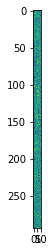

In [241]:
from matplotlib import pyplot as plt

plt.imshow(values[4], interpolation='nearest')
plt.show()